# Homework 2: Polynomial Regression, Normal Equation, Overfitting

#### Created by Xi Peng, Mar 2022

## 1. Introduction

In this homework you will answer questions to help you fully understand linear regression (Sec 2). You will also implement polynomial regression from scratch (Sec 3), compare the solution between gradient descent and normal equation, and get an idea of model complexity and overfitting (Sec 4).  

### What do you need to do?
#### a) Follow this Jupyter Notebook File (hw2.ipynb) LINE by LINE;
#### b) Implement your codes in the required functions;
#### c) Answer all the questions and paste all required figures.

### What do you need to submit?
#### a) "hw2.ipynb" (runable with your codes and answers)
#### b) "./figure/" (contains the figures).

In [2]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 2 Questions and Answers (30%)

Answer following questions. For mathmetical inputs, if you are not familiar with Latex, you can write the proof on paper, scan, and paste the copies right after the questions.



### 2.1 Dimension

Suppose we have $m=55$ training examples with $n=9$ features (excluding $x_0$). Let $x$ and $y$ denote the feature and label of one data example, $X$ and $Y$ denote the features and labels of all data examples, and $\Theta$ denote the parameters of the regression model. What is the dimension (put for example $15\times20$) of following variable:

a) $X$ is:

b) $Y$ is:

c) $\Theta$ is:

d) ${(X^TX)}^{-1}$ is:


### 2.2 Learning rate

Suppose we tried four different learning rates for gradient descent and observed four different cost-iteration curves. Given the learning rate, which curve (A, B, C, or D) most likely it would belong to? 

![learning-rate](figure/learning_rate.png)

a) Learning rate = 0.0005 is corresponding to curve:

b) Learning rate = 1.3 is corresponding to curve:

c) Learning rate = 0.01 is corresponding to curve:

d) Learning rate = 0.5 is corresponding to curve:


### 2.3 Gradient descent

Suppose we are using gradient descent to learn linear regression. The hypothesis is $h_{\theta}(x)=\theta_0+\theta_1x$. The initial values are $\theta_0=1$,$\theta_1=2$, and the learning rate is $0.5$. Suppose we have one data exmaple $(10,5)$ and use only this data example to update the model:

a) After the first step update, what is $\theta_0$ and $\theta_1$, respectively?

b) After the second step update, what is $\theta_0$ and $\theta_1$, respectively? 


### 2.4 Normal equation

Suppose you have a dataset with $m=1000$ examples and $n=200000$ features for each example. You want to use multivariate linear regression to fit the parameters $\theta$ to our data. Should you prefer gradient descent or the normal equation and WHY?


### 2.5 Feature Scaling

True or False?

a) Feature scaling speeds up gradient descent by making it require fewer iterations to get to a good solution.

b) Feature scaling prevents the matrix $\mathbf{X}^T\mathbf{X}$ (used in the normal equation) from being non-invertable (singular/degenerate).

c) Feature scaling is necessary to prevent the normal equation from getting stuck in local optima.

d) Feature scaling speeds up gradient descent by making each iteration of gradient descent less expensive to compute.


### 2.6 Traning and Test Plot

Given the training-test plot below ($M$ denotes the degress of Polynomial), answer the following questions
<div>
<img src="figure/train-test.png" width="500"/>
</div>

a) How many models have been trained and tested?

b) Which model(s) have the over-fitting issue? Which model(s) have the under-fitting issue?

c) Suppose a trained model has $\theta_3 = 19343$, what is the most likely value for $M$?


### Normal equation (Not required, Optional 5%)

Given the definition of maximimum likelihood estimation (MLE): $$\hat{\theta}_{MLE} = argmin \sum_{i=1}^{m} (h_\theta(\mathbf{x}_i) - y_i)^2$$, where $h_\theta(\mathbf{x}_i) = \theta^T \mathbf{x}_i$. Prove that the solution of MLE is $\hat{\theta}_{MLE}=(X^TX)^{-1}X^TY$. And in which case, the solution can be simplified as $\hat{\theta}_{MLE}=X^{-1}Y$?

[Paste your proof and solution here]


### Maximimum likelihood estimation (Not required, Optional 5%)

Given which assumption that maximimum likelihood estimation (MLE) is equivalent to the least squares regression model we have introduced in the class? Briefly prove that.

[Paste your proof and solution here]

 


## 3 Polynomial Regression (40%)

In this part of the exercise, you will repliate and expand upon the prototype data analysis problem in lecture slides "L5 Polynomial Regression.pdf".

### 3.1 Create training dataset

We create the data by sampling the sinusoidal function $f(x)=sin(2\pi x), x \in [0,1]$. Write the code to generate a dataset consisting of $m=200$ by evaluating the function $f(x)$ at $m$ uniformly sapced points in $x$ and adding I.I.D. white Gaussian noise with deviation $\sigma=0.1$. For instance: $$x_i = \frac{i}{m}, i=0,1,2,\cdots,m-1, y_i = f(x_i)+\epsilon_i, \epsilon_i \sim \mathcal{N}(0, \sigma^2)$$

Once generate the dataset, we can plot it out. You should get a similar figure like this:
![c](figure/dataset.png)


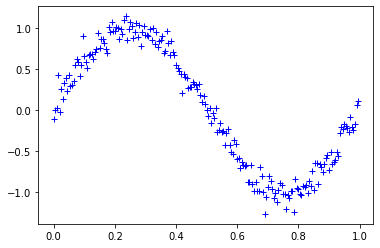

In [3]:
# Create training dataset
m = 200
mu = 0
sigma = 0.1
X_data = np.array([(i)/(m) for i in range(m)])

# [CHECKPOINT 1][5 points]
# Calculate Y
# Plot the dataset
# ======================= YOUR CODE HERE ===========================



# ==================================================================

### 3.2 Normal equation

We have learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

Hint: Before implement normal_equation function, following example shows how to convert array data to a matrix with a shape of $m \times 1$, and generate polynomial features matrix $[1, X, X^2, X^3, \cdots]$. 

In [ ]:
# Here is an example 
# convert X to a column matrix of 5 x 1
# generate polynomial [1 X X^2 X^3]
# Use this hint to implement normal_equation()
X_col = X_data[:5].reshape(5,1)
X_poly = np.power(X_col, np.arange(4))
print(X_col)
print(X_poly)

Complete the code for `normal_equation()` below which uses normal equation to estimate $\theta$ based on $X$ and $Y$. 

In [4]:
# [CHECKPOINT 2][10 points]
def normal_equation(X, Y, n):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, ).
    
    Y : array_like
        The value at each data point. A vector of shape (m, ).
        
    n : the order of polynomial regression model
        Remember the number of features will be n+1.
    
    Returns
    -------
    theta : array_like
        Estimated polynomial regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    m = X.size
    theta = np.zeros(n+1)
    
    # ===================== YOUR CODE HERE ============================
    X_col = 
    X_poly = 
    Y_col = 
    
    theta = 
        
    # =================================================================
    return theta.flatten()

Complete the code for `polynomial_deploy()` below which uses estimated $\theta$ to predict $Y$ given $X$. 

In [5]:
# [CHECKPOINT 3][5 points]
def polynomial_deploy(X, theta):
    """
    Computes the polynomial regression prediction for data X.
    
    Parameters
    ----------
    X : array_like
        The input data. A vector of shape (m, ).
    
    theta : array_like
        Polynomial regression parameters. A vector of shape (n+1, ).
    
    Returns
    -------
    Y : array_like
        Polynomial prediction. A vector of shape (m, ).
    
    """
    m = X.size
    n = theta.size - 1
    
    # ===================== YOUR CODE HERE ============================
    X_col = 
    X_poly = 
    
    theta_col = 
    
    Y = 
    # ===================== YOUR CODE HERE ============================
    
    return Y.flatten()
    
    

### 3.3 Polynomial fitting

Now repeat the polynomial fitting experiment by selecting a random subset of the dataset to train the model. The training set size is selected as: $m=\{10, 50, 100, 200\}$. The order of polynomials is selected as: $n=\{0,1,2,3,9\}$. So totally you will train $4\times5=20$ models.

For each model, report estimated model parameters, calculate the MSEs, and plot the regression model together with the data examples used for training.

The order of polynomial: 0
Theta:
[0.01658722]
MSE: 0.53606611
The order of polynomial: 1
Theta:
[ 1.02168382 -1.7287301 ]
MSE: 0.30036960
The order of polynomial: 2
Theta:
[ 1.69777575 -4.57354694  2.02019714]
MSE: 0.07139392
The order of polynomial: 3
Theta:
[ -0.12304396  11.73945523 -34.14279899  22.67491889]
MSE: 0.01084820
The order of polynomial: 9
Theta:
[ 4.08207673e+01 -8.98918708e+02  8.11456638e+03 -3.78483080e+04
  9.69434475e+04 -1.26263041e+05  3.78440125e+04  1.03881518e+05
 -1.25702056e+05  4.40425219e+04]
MSE: 0.00004898
The order of polynomial: 0
Theta:
[0.09132575]
MSE: 0.52025616
The order of polynomial: 1
Theta:
[ 0.96162726 -2.03403083]
MSE: 0.19298678
The order of polynomial: 2
Theta:
[ 0.96877919 -2.53499635  0.82801193]
MSE: 0.23286242
The order of polynomial: 3
Theta:
[ -0.1651479   12.00018322 -34.87735731  23.26974095]
MSE: 0.02060508
The order of polynomial: 9
Theta:
[-9.63957017e-02  1.19582774e+01 -8.47260303e+01  6.56416849e+02
 -3.51910912e+03  1.09629

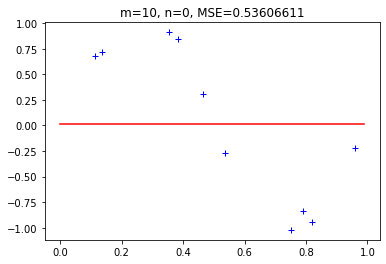

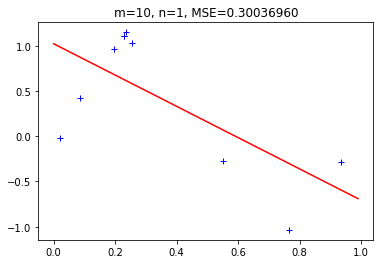

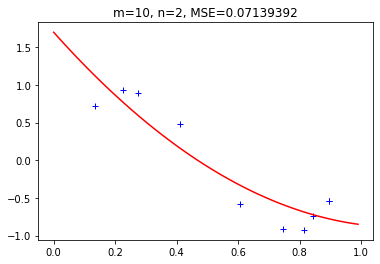

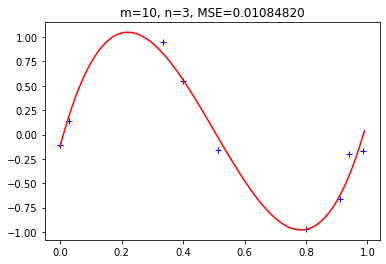

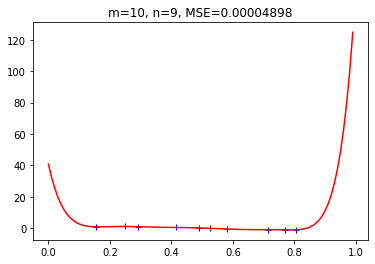

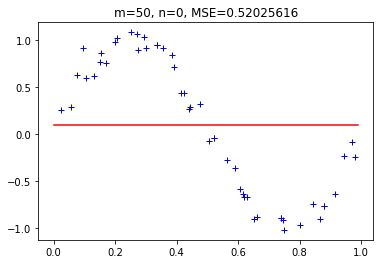

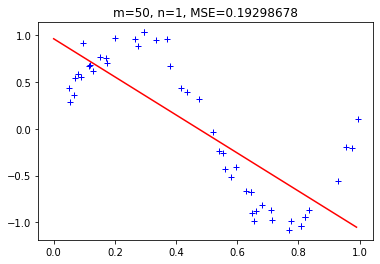

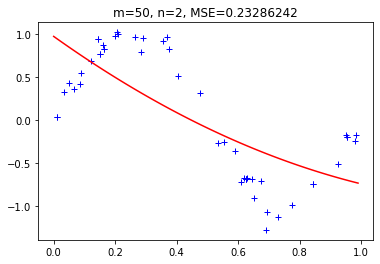

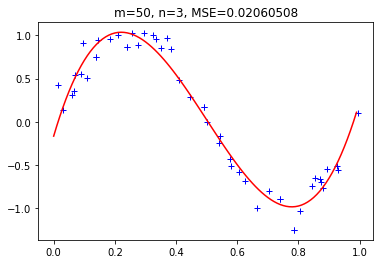

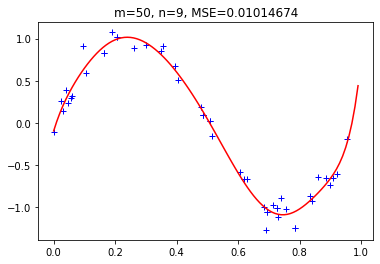

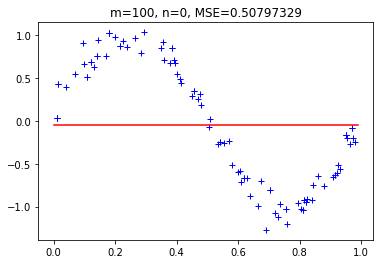

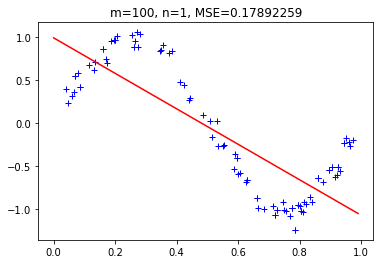

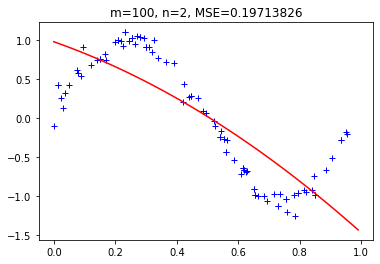

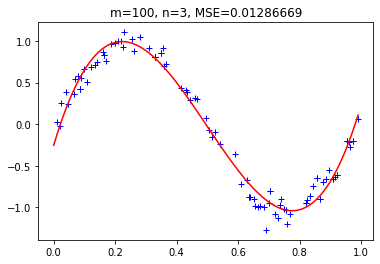

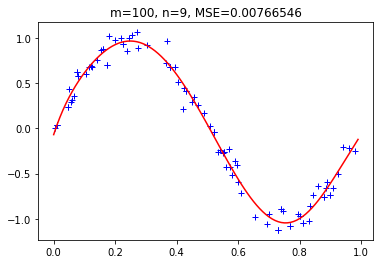

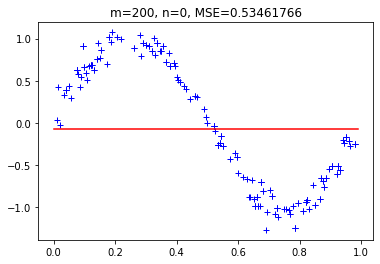

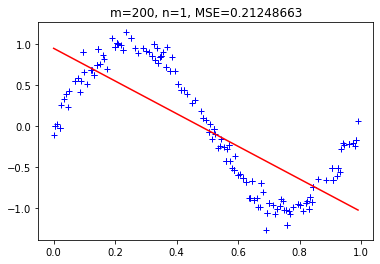

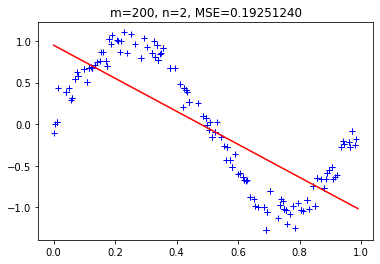

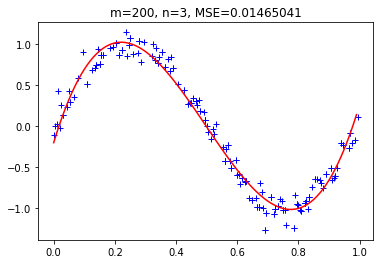

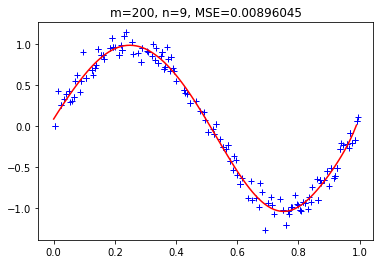

In [7]:
# [CHECKPOINT 4][5 points]
# You mush use loop to traverse the combinations of m and n
#
# Hint for debug:
# A quick way to check if your implementation is correct is to use 'np.polyfit'
# e.g. theta2 = np.polyfit(X_data, Y_data, n)
# Check if 'theta' estimated by normal_equation() is the same as 'theta2' 
#
for m in [10, 50, 100, 200]:
    for n in [0, 1, 2, 3, 9]:
        subset_index = np.random.randint(0, X_data.size, m)
        
        X_subset = X_data[subset_index]
        Y_subset = Y_data[subset_index]
        
        # ===================== YOUR CODE HERE ============================
        theta = 
        Y_predict = 
        MSE = 
                        
        print('The order of polynomial: %d' % n)
        print('Theta:')
        print(theta)
        print('MSE: %.8f' % MSE)
        
        # plot the polynomial curve
        plt.figure()
        plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
        plt.plot(X_subset, Y_subset, 'b+')
        X_plot = np.arange(0,1,0.01)
        Y_plot = polynomial_deploy(X_plot, theta)
        plt.plot(X_plot, Y_plot, 'r-')          
        # =================================================================



### 3.4 Discussion

Based on the experimental results, talk about your observations. 

[CHECKPOINT 5][5 points]

======================= YOUR DISCUSSION HERE ==========================

Try to talk about following aspects:
1. Given fixed m, when n increase, how about underfitting/overfitting and fitting error?  
2. Given fixed n, when m increase, how about underfitting/overfitting and fitting error?
3. Which model has the best performance? And why?
4. Your conclusion.

====================================================================

## 4 Regularization (30%)

Following Sec. 3, you will implement the regularization and perform abation study to better understand underfitting, overfitting, and regularization. 

### 4.1 Regularized polynomial regression

Complete the codes to implement the function `normal_equation_reg()` below.

In [ ]:
# [CHECKPOINT 6][10 points]
def normal_equation_reg(X, Y, n, lambd):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, ).
    
    Y : array_like
        The value at each data point. A vector of shape (m, ).
        
    n : the order of polynomial regression model
        Remember the number of features will be n+1.
        
    lambd: the weight to ballance fitting error and regularization loss
    
    Returns
    -------
    theta : array_like
        Estimated polynomial regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(n+1)
    
    # ===================== YOUR CODE HERE ============================

    
    # =================================================================
    return theta

### 4.2 Create testing dataset

Create a testing dataset contains 199 uniformly spaced data points: $$x_{i,test} = x_{i,train} + \frac{1}{2 \times (m-1)}, i = 1, \cdots, m-1, y_{i,test} = f(x_{i,test})$$.
Once generate the dataset, you need to plot it out.

In [78]:
# [CHECKPOINT 7][5 points]
# Create the testing dataset
# Plot the dataset
# ======================= YOUR CODE HERE ===========================



# ==================================================================

### 4.3 Polynomial fitting

Similar to Sec 3.3, we try

The training set size is selected as: $m=\{10, 50\}$. The order of polynomials is selected as: $n=\{3, 9\}$. Try different values of $lambda$ for each model, such as $ln\lambda = {-\infty, -18, 0}$, and pick out the best value.

For each model, report estimated model parameters, calculate the MSEs on training and testing data respectively, and plot the regression model together with the training and testing data. Use different color to distinguish training and testing data.

Note: The testing set has a fixed number (199) of data points. No matter how many training data points are used to train the model, all the testing data points will be tested.

In [ ]:
# [CHECKPOINT 8][10 points]
#
# ======================= YOUR CODE HERE ===========================



# ==================================================================

### 4.4 Discussion

Based on the experimental results, talk about your observations. 

[CHECKPOINT 9][5 points]

======================= YOUR DISCUSSION HERE ==========================

Try to talk about following aspects:
1. How the lambda affect the learned model.  
2. Compare the results of Sec 3.3 and Sec 4.3 that share the same setups.
3. Your conclusion.

========================================================================